In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

import spykshrk.realtime.simulator.nspike_data as nspike_data


#pd.set_option('float_format', '{:,.2f}'.format)
pd.set_option('display.precision', 4)
pd.set_option('display.max_rows', 10)
#pd.set_option('display.width', 180)


idx = pd.IndexSlice

In [4]:
# Load merged rec HDF store based on config

#config_file = '/opt/data36/daliu/realtime/spykshrk/test/test_animal.config.json'
config_file = '/opt/data36/daliu/realtime/spykshrk/ripple_dec/bond.config.json'
config = json.load(open(config_file, 'r'))

hdf_file = os.path.join(config['files']['output_dir'],
                        '{}.rec_merged.h5'.format(config['files']['prefix']))

store = pd.HDFStore(hdf_file, mode='r')

pos_num_bins = config['encoder']['position']['bins']


In [3]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: /opt/data/daliu/realtime/spykshrk/ripple_dec/bond.rec_merged.h5
/rec_1              frame        (shape->[11327852,10])
/rec_10             frame        (shape->[9142,4])     
/rec_100            frame        (shape->[46368639,8]) 
/rec_11             frame        (shape->[381,4])      
/rec_3              frame        (shape->[70087,454])  
/rec_4              frame        (shape->[8957,452])   

In [6]:
decoder_df = store['rec_4']

In [22]:
decoder_df

,rec_ind,timestamp,x0,x1,x2,x3,x4,x5,x6,x7,...,x440,x441,x442,x443,x444,x445,x446,x447,x448,x449
0,14,73830000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,73833000,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,73836000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40,73839000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,73842000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8952,78996,102132000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8953,79006,102135000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8954,79009,102138000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8955,79018,102141000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Get real position

nspike_anim = nspike_data.AnimalInfo(**config['simulator']['nspike_animal_info'])
pos = nspike_data.PosMatDataStream(nspike_anim)
pos_data = pos.data

# Transform position into simpler table with only linear position
pos_data_time = pos_data.loc[:, 'time']

pos_data_linpos = pos_data.loc[:,'lin_dist_well']
pos_data_linpos.loc[:, 'lin_vel_center'] = pos_data.loc[:,('lin_vel', 'well_center')]
pos_data_linpos.loc[:, 'seg_idx'] = pos_data.loc[:,('seg_idx', 0)]
pos_data_linpos.loc[:,'timestamps'] = pos_data_time*30000
pos_data_linpos = pos_data_linpos.set_index('timestamps')

# Convert real pos to realtime system linear map (single linear coordinate)

center_pos_flat = pos_data_linpos[pos_data_linpos['seg_idx'] == 1]['well_center']
left_pos_flat = pos_data_linpos[(pos_data_linpos['seg_idx'] == 2) | 
                                (pos_data_linpos['seg_idx'] == 3)]['well_left'] + 150
right_pos_flat = pos_data_linpos[(pos_data_linpos['seg_idx'] == 4) | 
                                 (pos_data_linpos['seg_idx'] == 5)]['well_right'] + 300

center_pos_flat.name = 'linpos_flat'
left_pos_flat.name = 'linpos_flat'
right_pos_flat.name = 'linpos_flat'

linpos_flat = pd.concat([center_pos_flat, left_pos_flat, right_pos_flat])
linpos_flat = linpos_flat.sort_index()


PosMatData: INIT start
/opt/data/daliu/other/mkarlsso/Bon
['/opt/data/daliu/other/mkarlsso/Bon/bonlinpos04.mat']
[(4, '/opt/data/daliu/other/mkarlsso/Bon/bonlinpos04.mat')]
PosMatData: INIT done


/home/daliu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/daliu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [24]:
stim_lockout = store['rec_11']
stim_lockout_ranges = stim_lockout.pivot(index='lockout_num',columns='lockout_state', values='timestamp')
stim_lockout_ranges = stim_lockout_ranges.reindex(columns=[1,0])

In [41]:
def plot_decode_2d(dec_est, dec_bin_times, stim_lockout_ranges, linpos_flat, plt_range):
    stim_lockout_ranges_sec = stim_lockout_ranges/30000
    stim_lockout_range_sec_sub = stim_lockout_ranges_sec[(stim_lockout_ranges_sec[1] > plt_range[0]) &
                                                         (stim_lockout_ranges_sec[0] < plt_range[1])]
    
    plt.imshow(dec_est[(dec_bin_times > plt_range[0]*30000) & (dec_bin_times < plt_range[1]*30000)].transpose(), 
               extent=[plt_range[0], plt_range[1], 0, 450], origin='lower', aspect='auto', cmap='hot', zorder=0)

    plt.colorbar()

    # Plot linear position
    linpos_index_s = linpos_flat.index / 30000
    index_mask = (linpos_index_s > plt_range[0]) & (linpos_index_s < plt_range[1])

    plt.plot(linpos_index_s[index_mask],
             linpos_flat.values[index_mask], 'c.', zorder=1, markersize=5)

    
    plt.plot(stim_lockout_range_sec_sub.values.transpose(), np.tile([[440], [440]], [1, len(stim_lockout_range_sec_sub)]), 'c-*' )

    for stim_lockout in stim_lockout_range_sec_sub.values:
        plt.axvspan(stim_lockout[0], stim_lockout[1], facecolor='#AAAAAA', alpha=0.3)

    plt.plot(plt_range, [74, 74], '--', color='gray')
    plt.plot(plt_range, [148, 148], '--', color='gray')
    plt.plot(plt_range, [256, 256], '--', color='gray')
    plt.plot(plt_range, [298, 298], '--', color='gray')
    plt.plot(plt_range, [407, 407], '--', color='gray')


In [35]:
decoder_df['timestamp']/30000

0      2,461.0
1      2,461.1
2      2,461.2
3      2,461.3
4      2,461.4
         ...  
8952   3,404.4
8953   3,404.5
8954   3,404.6
8955   3,404.7
8956   3,404.8
Name: timestamp, Length: 8957, dtype: float64

In [49]:
decoder_df

,rec_ind,timestamp,x0,x1,x2,x3,x4,x5,x6,x7,...,x440,x441,x442,x443,x444,x445,x446,x447,x448,x449
0,14,73830000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,73833000,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,73836000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40,73839000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,73842000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8952,78996,102132000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8953,79006,102135000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8954,79009,102138000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8955,79018,102141000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


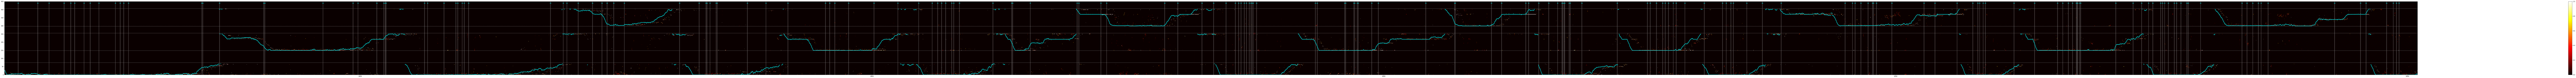

In [43]:
plt_ranges = [[2461, 3404]]
for plt_range in plt_ranges:
    plt.figure(figsize=(400,10))
    plot_decode_2d(decoder_df.loc[:,'x0':'x449'].values,
                  decoder_df['timestamp'], stim_lockout_ranges, linpos_flat, plt_range)
plt.show()